In [20]:
import importlib as imt
import datasets_v2
import frame_autoencoder_v2
imt.reload(datasets_v2)
imt.reload(frame_autoencoder_v2)
from frame_autoencoder_v2 import frame_autoencoder

In [13]:
import datetime as dt
import tensorflow as tf

import skimage
from skimage.io import imread
from skimage.io import imsave
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Input, InputLayer
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.layers import Conv3D, Conv3DTranspose
from tensorflow.keras.layers import Reshape, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.datasets import mnist
from tensorflow.keras.callbacks import TensorBoard

### Run Autoencoding Baseline

In [14]:
frame = frame_autoencoder(latent_dim=64)
frame.load_and_condition_dataset_v2()
frame.build_baseline_autoencoder()

In [15]:
inp = Input(frame.input_shape)
code = frame.encoder(inp)
reconstruction = frame.decoder(code)

In [16]:
autoencoder = Model(inp,reconstruction)
autoencoder.compile(optimizer='adamax', loss='mse')

In [17]:
log_dir="../logs/autoencoder/train/" + dt.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard = TensorBoard(log_dir=log_dir, histogram_freq=1)
history = autoencoder.fit(x=frame.X_train, 
                        y=frame.y_train, 
                        epochs=20, 
                        validation_split=0.2,
                        callbacks = [tensorboard])

Train on 6415 samples, validate on 1604 samples
Epoch 1/20
6415/6415 [==============================] - 4s 632us/sample - loss: 0.0379 - val_loss: 0.0116
Epoch 2/20
6415/6415 [==============================] - 3s 544us/sample - loss: 0.0115 - val_loss: 0.0111
Epoch 3/20
6415/6415 [==============================] - 3s 542us/sample - loss: 0.0108 - val_loss: 0.0101
Epoch 4/20
6415/6415 [==============================] - 3s 541us/sample - loss: 0.0096 - val_loss: 0.0089
Epoch 5/20
6415/6415 [==============================] - 3s 533us/sample - loss: 0.0084 - val_loss: 0.0079
Epoch 6/20
6415/6415 [==============================] - 3s 535us/sample - loss: 0.0075 - val_loss: 0.0071
Epoch 7/20
6415/6415 [==============================] - 3s 533us/sample - loss: 0.0068 - val_loss: 0.0065
Epoch 8/20
6415/6415 [==============================] - 3s 535us/sample - loss: 0.0063 - val_loss: 0.0063
Epoch 9/20
6415/6415 [==============================] - 3s 541us/sample - loss: 0.0059 - val_loss: 0.005

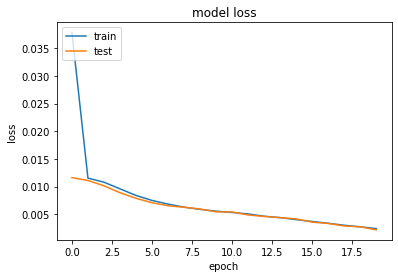

In [19]:
frame_autoencoder_v2.plot_history(history)

In [22]:
log_dir="../logs/autoencoder/evaluate/" + dt.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard = TensorBoard(log_dir=log_dir, histogram_freq=1)    
autoencoder.evaluate(x=frame.X_test, 
                        y=frame.y_test, 
                        #batch_size=frame.batch_size, 
                        verbose=1, 
                        callbacks=[tensorboard], 
                        #max_queue_size=10, 
                        #workers=1, 
                        use_multiprocessing=False
)

891/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0022333354267681607

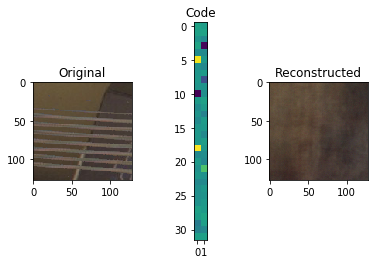

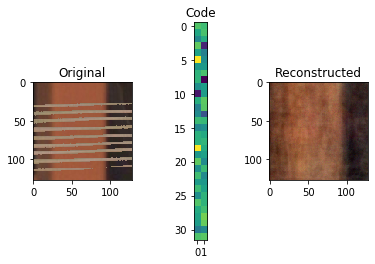

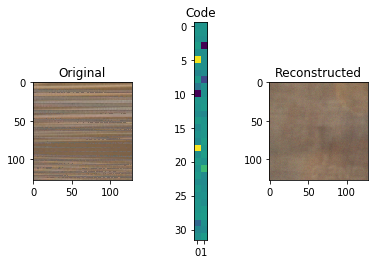

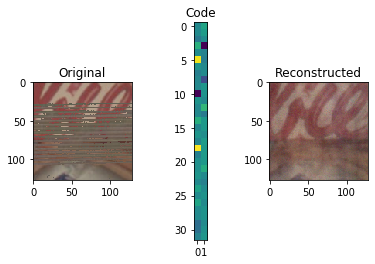

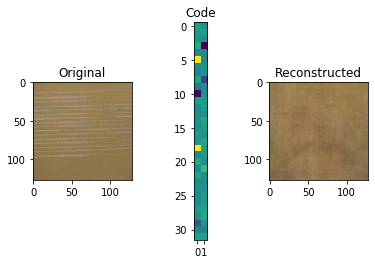

In [24]:
for i in range(5):
        img = frame.X_test[i]
        frame_autoencoder_v2.visualize(img,frame.encoder,frame.decoder)

In [26]:
images = datasets_v2.load_test_data(5)

In [27]:
images = images.astype('float32') / 255

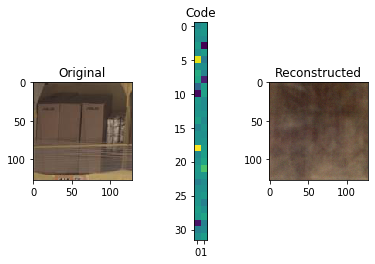

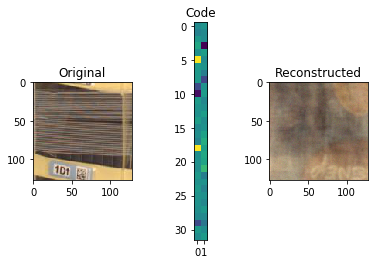

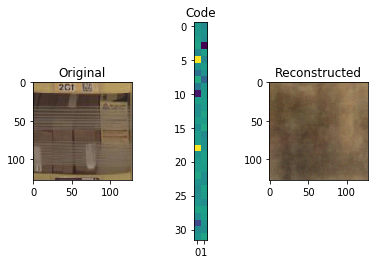

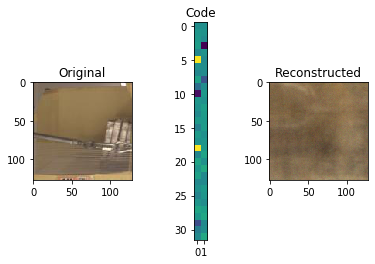

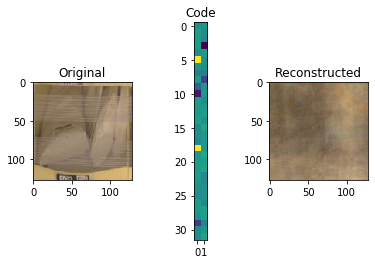

In [28]:
for i in range(5):
        img = images[i]
        frame_autoencoder_v2.visualize(img,frame.encoder,frame.decoder)

In [10]:
import gc
gc.collect()

304

In [29]:
dt.datetime.now() 

datetime.datetime(2020, 2, 27, 8, 25, 54, 661233)

datetime.datetime(2020, 2, 27, 8, 25, 54, 661233)